# Project 4: Regression Analysis

Wenxin Cheng	706070535    wenxin0319@g.ucla.edu

Yuxin Yin		606073780    yyxyy999@g.ucla.edu

Yingqian Zhao	306071513    zhaoyq99@g.ucla.edu

## 0 pre-install packages

In [7]:
# !pip install statsmodels
# !pip install scipy
# conda install -c anaconda graphviz

In [8]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm
import scipy.stats as ss
from tempfile import mkdtemp
from joblib import Memory
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

In [9]:
## reading Dataset1 Diamonds.csv
diamond_data = pd.read_csv('diamonds.csv', index_col=0)
print(diamond_data.head())

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    330  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    327  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    328  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    337  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    338  4.34  4.35  2.75


In [17]:
## reading Dataset2 pp_gas_emission
gt2011 = pd.read_csv("pp_gas_emission/gt_2011.csv")
gt2012 = pd.read_csv("pp_gas_emission/gt_2012.csv")
gt2013 = pd.read_csv("pp_gas_emission/gt_2013.csv")
gt2014 = pd.read_csv("pp_gas_emission/gt_2014.csv")
gt2015 = pd.read_csv("pp_gas_emission/gt_2015.csv")
gt2011["year"] = [2011] * len(gt2011)
gt2012["year"] = [2012] * len(gt2012)
gt2013["year"] = [2013] * len(gt2013)
gt2014["year"] = [2014] * len(gt2014)
gt2015["year"] = [2015] * len(gt2015)
gt_data_ = pd.concat([gt2011, gt2012, gt2013, gt2014, gt2015])
#picking NOX droping CO
# gt_data_.drop('CO',axis = 1)
gt_data = gt_data_.copy().drop('CO',axis = 1)

### Question 1

In [11]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [18]:
gt_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX,year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028,2011


#### Question1.1

In [12]:
diamond_corr = diamond_data.corr()
gt_corr = gt_data.corr()

def plot_heatmap(dataset, title):
    plt.figure(figsize=(10,8))
    sns.heatmap(dataset,
            xticklabels=dataset.columns,
            yticklabels=dataset.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
    plt.title(f"heatmap for {title}")       

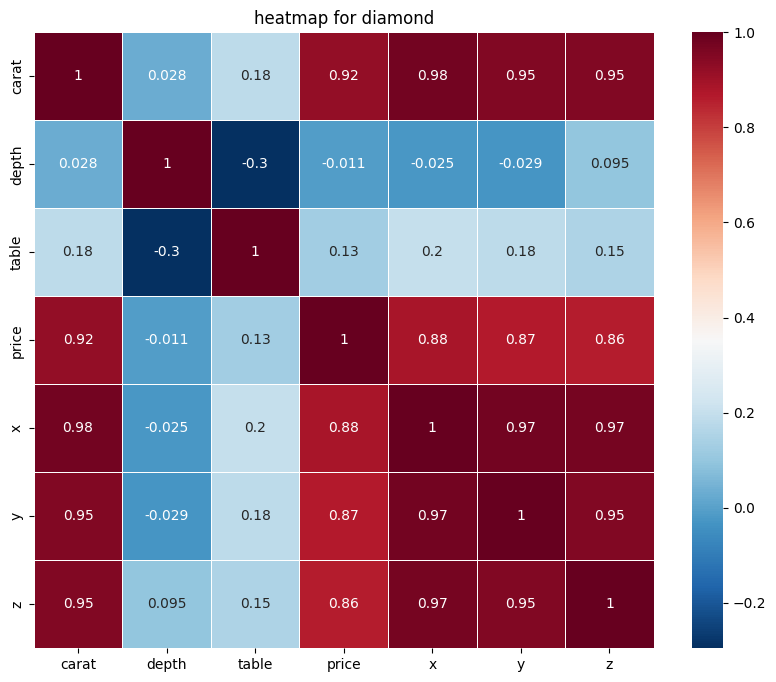

In [13]:
plot_heatmap(diamond_corr, "diamond")

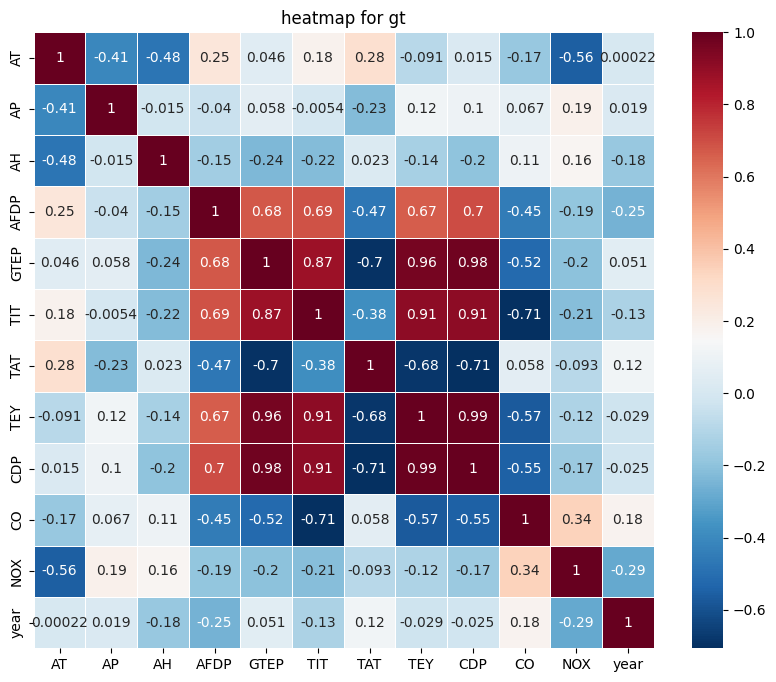

In [14]:
plot_heatmap(gt_corr, "gt")

#### Question1.2

In [19]:
def plot_histogram(dataset, features):
    fig, axs = plt.subplots(3, 3, figsize=(10, 8))
    for i in range(3):
        for j in range(3):
            index = i * 3 + j
            feature = features[index]
            axs[i, j].hist(dataset[feature], edgecolor='k', linewidth=1, alpha=0.8)
            axs[i, j].set_title(f"frequency of {str(feature)}")
            axs[i, j].set(xlabel=str(feature), ylabel=f"frequency of {str(feature)}")
    fig.tight_layout()

9


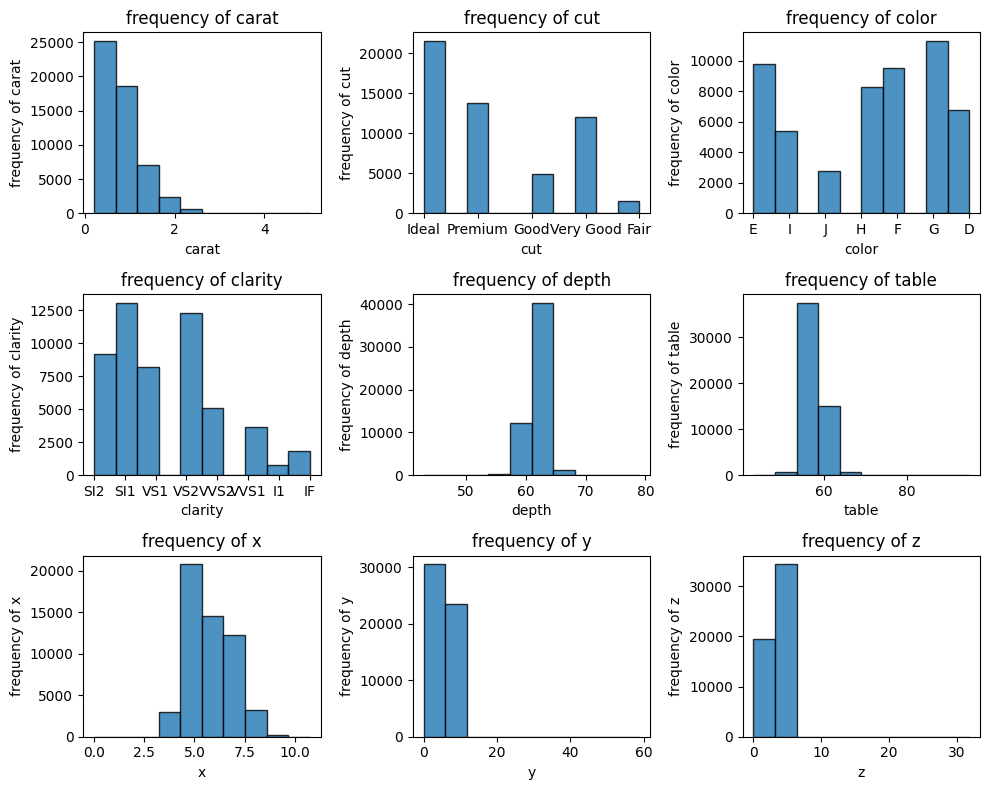

In [20]:
diamonds_features = ["carat","cut","color","clarity","depth","table","x","y","z"]
print(len(diamonds_features))
plot_histogram(diamond_data,diamonds_features)

9


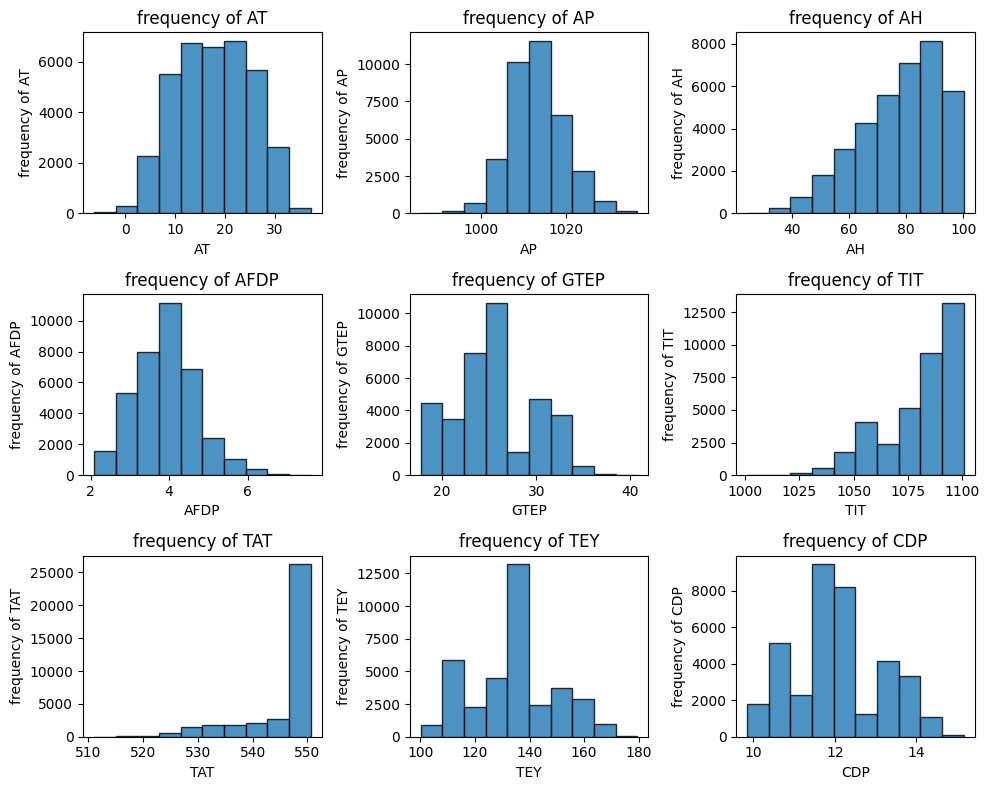

In [21]:
gt_features = ["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP"]
print(len(gt_features))
plot_histogram(gt_data,gt_features)

#### Question1.3

In [22]:
def plot_boxplot(dataset, features, target, row, col):
    fig, axes = plt.subplots(row, col, figsize=(10, 8))

    for name, ax in zip(features, axes.flatten()):
        sns.boxplot(y=dataset[target], x= dataset[name], orient='v', ax=ax)
        ax.set_title(f"boxplot of {str(name)}")
        ax.set(xlabel=str(name), ylabel=f"boxplot of {str(name)}")
    fig.tight_layout()

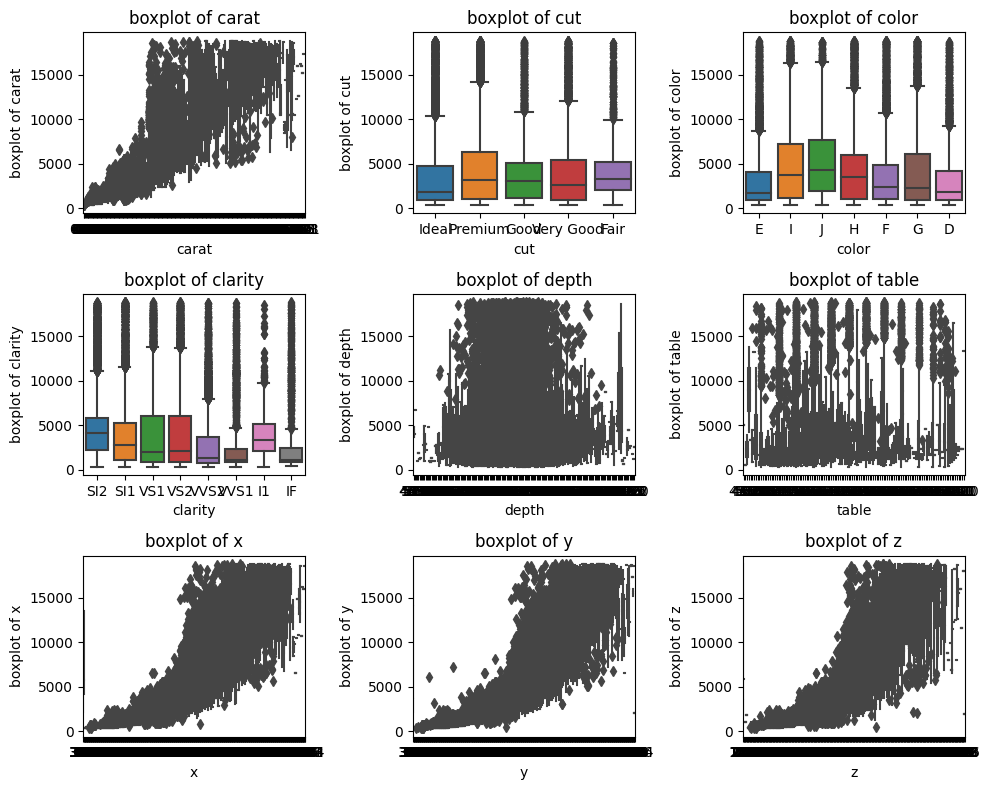

In [23]:
plot_boxplot(diamond_data,diamonds_features,"price",3, 3)

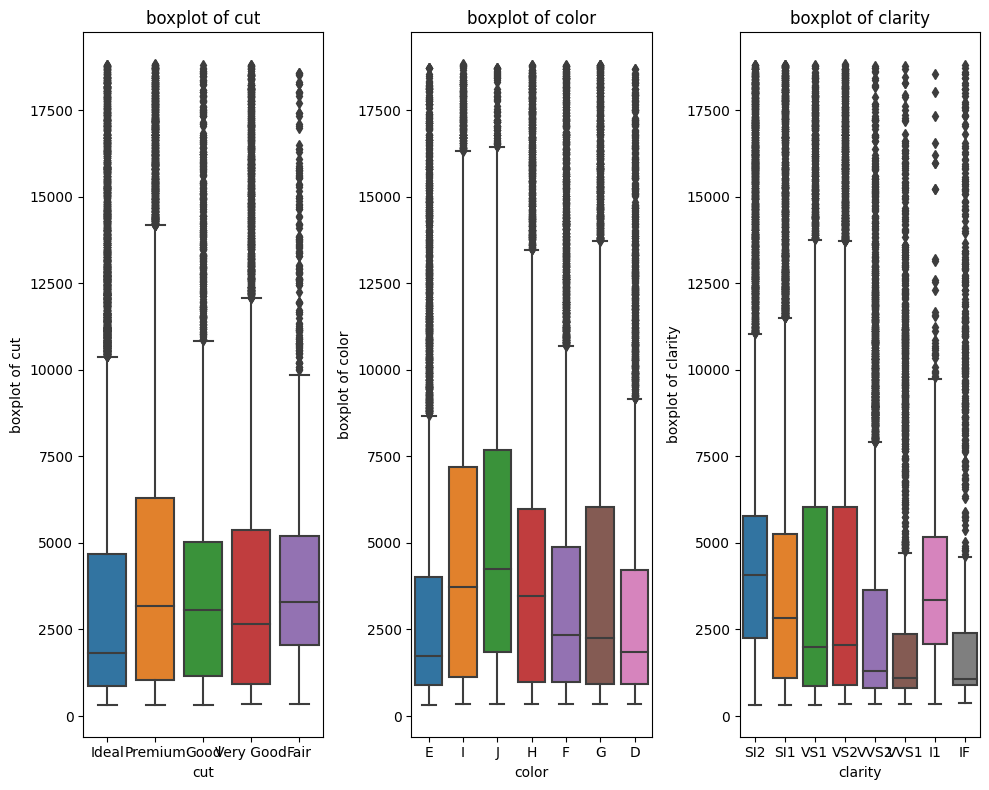

In [24]:
diamonds_labels = ["cut","color","clarity"]
plot_boxplot(diamond_data,diamonds_labels,"price",1, 3)

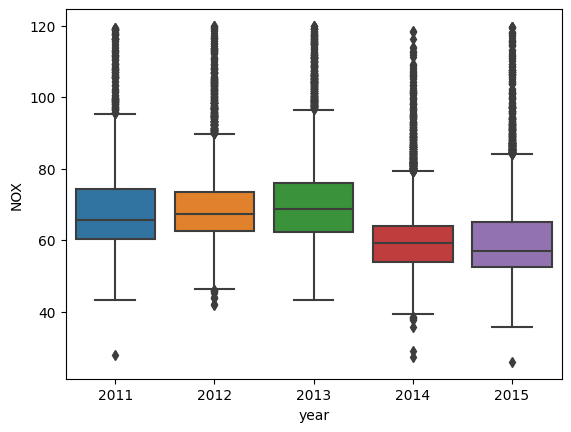

In [25]:
sns.boxplot(x = gt_data["year"],y = gt_data["NOX"], order=list(set(gt_data["year"])))
plt.show()

In [26]:
def plot_count(dataset,features):
    for feature in features:
        x_axis = list(dataset[feature].unique())
        y_axis = dataset[feature].value_counts().to_list()
        plt.bar(x_axis, y_axis, width=0.5)
        plt.ylabel(f"Count of {str(feature)}")
        plt.xlabel(f"{str(feature)}")
        plt.title(f"Count of {str(feature)}")
        plt.show()

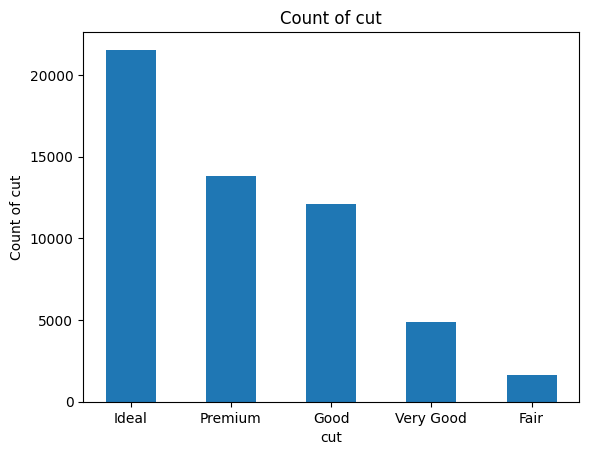

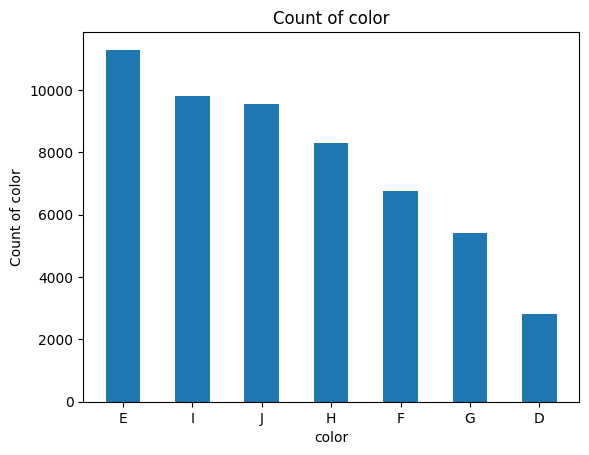

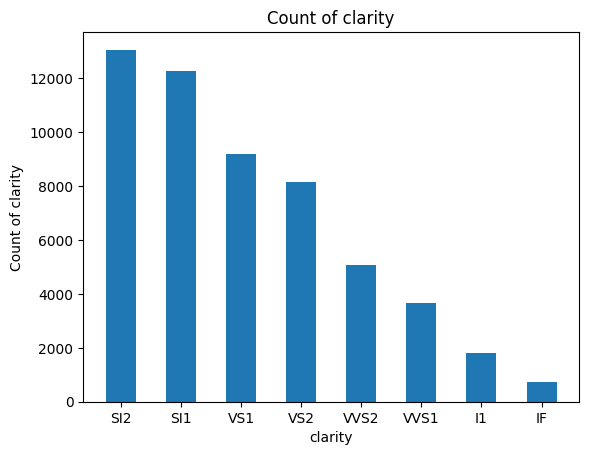

In [27]:
plot_count(diamond_data,diamonds_labels)

#### Question1.4

In [28]:
def plot_trend(dataset, features):
    year_list = [2011,2012,2013,2014,2015]
    fig, axs = plt.subplots(3, 3, figsize=(10, 8))
    for i in range(3):
        for j in range(3):
            index = i * 3 + j
            feature = features[index]
            for year in year_list:
                data_ = gt_data.loc[gt_data['year'] == year,feature].rolling(500).mean()
                axs[i, j].plot(data_,label = str(year))
                axs[i, j].set_title("Trends for "+ str(feature))
                axs[i, j].set(xlabel="Times", ylabel=str(feature))
                axs[i, j].legend(loc='lower right')
    fig.tight_layout()

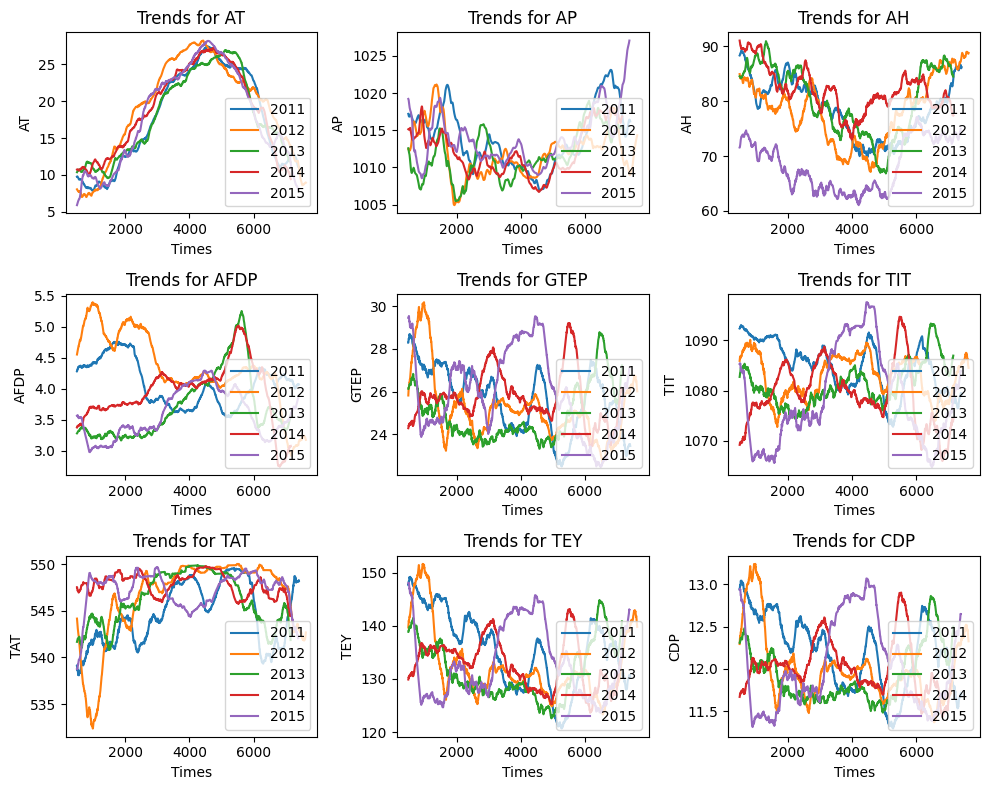

In [29]:
plot_trend(gt_data, gt_features)

### Question 2

#### Question2.1

In [2]:
# Standardization
# for diamonds encoding
cut_encoding = {'Fair' : 1, 'Good' : 2, 'Ideal' : 3, 'Premium' : 4, 'Very Good' : 5}
color_encoding = {'J' : 1, 'I' : 2, 'H' : 3, 'G' : 4, 'F' : 5, 'E' : 6, 'D' : 7}
clarity_encoding = {'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7, 'IF' : 8}

def encode_feature(df, feature, encoding_dict):
  features = df[feature]
  encoded_feats = [encoding_dict[f] for f in features]
  df[feature] = encoded_feats

encode_feature(diamond_data, 'cut', cut_encoding)
encode_feature(diamond_data, 'color', color_encoding)
encode_feature(diamond_data, 'clarity', clarity_encoding)

In [4]:
# standard
diamond_standard = pd.DataFrame(preprocessing.scale(diamond_data),columns = diamond_data.columns)

gt_scale = gt_data.copy().drop('year',axis = 1)
#picking NOX droping CO
gt_standard = pd.DataFrame(preprocessing.scale(gt_scale),columns = gt_scale.columns)
gt_standard['year'] = np.asanyarray(gt_data['year'])

In [5]:
diamond_standard.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,-0.538099,0.937163,-1.245215,-0.174092,-1.099672,-0.903594,-1.587837,-1.536196,-1.571129
1,-1.240361,0.434949,0.937163,-0.638095,-1.360738,1.585529,-0.904346,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.511147,0.937163,0.576145,-3.385019,3.375663,-0.904095,-1.498691,-1.457395,-1.741175
3,-1.071587,0.434949,-1.414272,-0.030975,0.454133,0.242928,-0.901839,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.511147,-2.002131,-1.245215,1.082358,0.242928,-0.901588,-1.240167,-1.212238,-1.117674


In [6]:
gt_standard.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX,year
0,-1.762362,0.871052,0.401627,-0.451875,-0.377702,0.272119,0.536589,0.074502,-0.149273,1.426499,2011
1,-1.801920,0.809164,0.440351,-0.458207,-0.384376,0.266417,0.568742,0.074502,-0.154783,1.462891,2011
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,1.582687,2011
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,1.473852,2011
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,1.433006,2011


#### Question2.2

In [34]:
def select_topn_important_features(X, Y, n):
  Mutual_ = mutual_info_regression(X, Y)
  F_ = f_regression(X, Y)
  
  topn_M = np.argsort(Mutual_)[::-1][:n]
  topn_F = np.argsort(F_[0])[::-1][:n]

  all_m = np.argsort(Mutual_)[::-1]
  all_f = np.argsort(F_[0])[::-1]

  X_topn_M = X.iloc[:, topn_M]
  X_topn_F = X.iloc[:, topn_F]

  all_m_ = X.iloc[:, all_m]
  all_f_ = X.iloc[:, all_f]

  return X_topn_M, X_topn_F, all_m_, all_f_

In [8]:
diamond_standard_x = diamond_standard.copy().drop('price',axis = 1)
diamond_standard_y = diamond_standard["price"]

gt_standard_x = gt_standard.copy().drop(['NOX','year'],axis = 1)
gt_standard_y = gt_standard["NOX"]

In [35]:
diamond_top5_M, diamond_top5_F, dall_m, dall_f = select_topn_important_features(diamond_standard_x, diamond_standard_y,5)
gt_top5_M, gt_top5_F,gall_m, gall_f = select_topn_important_features(gt_standard_x, gt_standard_y,5)

print("diamond Top5 by mutual_info_regression:")
print(diamond_top5_M.columns)

print("diamond Top5 by f_regression:")
print(diamond_top5_F.columns)

print("gt Top5 by mutual_info_regression:")
print(gt_top5_M.columns)

print("gt Top5 by f_regression:")
print(gt_top5_F.columns)

diamond Top5 by mutual_info_regression:
Index(['carat', 'y', 'x', 'z', 'clarity'], dtype='object')
diamond Top5 by f_regression:
Index(['carat', 'x', 'y', 'z', 'color'], dtype='object')
gt Top5 by mutual_info_regression:
Index(['TIT', 'TEY', 'AT', 'GTEP', 'CDP'], dtype='object')
gt Top5 by f_regression:
Index(['AT', 'TIT', 'GTEP', 'AP', 'AFDP'], dtype='object')


In [1]:
print(dall_m.columns)

Index(['carat', 'y', 'x', 'z', 'clarity', 'color', 'cut', 'table', 'depth'], dtype='object')


In [2]:
print(gall_m.columns)

Index(['TIT', 'TEY', 'AT', 'GTEP', 'CDP', 'AFDP', 'TAT', 'AP', 'AH'], dtype='object')


In [21]:
diamond_top5_M.head()

,carat,y,x,z,clarity
0,-1.198168,-1.536196,-1.587837,-1.571129,-1.245215
1,-1.240361,-1.658774,-1.641325,-1.741175,-0.638095
2,-1.198168,-1.457395,-1.498691,-1.741175,0.576145
3,-1.071587,-1.317305,-1.364971,-1.287720,-0.030975
4,-1.029394,-1.212238,-1.240167,-1.117674,-1.245215


### Question3

In [9]:
rf_diamond_ = RandomForestRegressor(n_estimators=10, max_features=4, max_depth=4, oob_score=True)
rf_diamond_.fit(diamond_standard_x, diamond_standard_y)
                   
print('Best Random Forest Model for Diamond Dataset:')
print('OOB score: %.4f' %(rf_diamond_.oob_score_))
print('R^2 score: %.4f' %(rf_diamond_.score(diamond_standard_x, diamond_standard_y)))

Best Random Forest Model for Diamond Dataset:
OOB score: 0.9030
R^2 score: 0.9202


In [10]:
rf_gt_ = RandomForestRegressor(n_estimators=30, max_features=4, max_depth=4, oob_score=True)
rf_gt_.fit(gt_standard_x, gt_standard_y)
                   
print('Best Random Forest Model for Diamond Dataset:')
print('OOB score: %.4f' %(rf_gt_.oob_score_))
print('R^2 score: %.4f' %(rf_gt_.score(gt_standard_x, gt_standard_y)))

Best Random Forest Model for Diamond Dataset:
OOB score: 0.5951
R^2 score: 0.6063


### Question4

#### Question4.1

In [ ]:
# now we are do experiments of exactly how many features we need to select for two dataset

#with selection
diamonds_rmse_lr_m = []  #diamonds rmse score for linear regression and with mutual_info_regression
diamonds_rmse_lr_f = []
diamonds_rmse_r_m = []
diamonds_rmse_r_f = []
diamonds_rmse_la_m = []
diamonds_rmse_la_f = []

#without selection
diamonds_rmse_lr = [] #diamonds rmse score for linear regression
diamonds_rmse_r = []
diamonds_rmse_la = []

#with selection
gt_rmse_lr_m = []  #gt rmse score for linear regression and with mutual_info_regression
gt_rmse_lr_f = []
gt_rmse_r_m = []
gt_rmse_r_f = []
gt_rmse_la_m = []
gt_rmse_la_f = []

#without selection
gt_rmse_lr = [] #gt rmse score for linear regression
gt_rmse_r = []
gt_rmse_la = []

In [40]:
# for diamonds part
for k in range(1, len(diamonds_features)):
    diamond_topk_M, diamond_topk_F = select_topn_important_features(diamond_standard_x, diamond_standard_y, k)
    #diamonds rmse score for linear regression
    score_ = cross_validate(LinearRegression(), diamond_standard_x, diamond_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"diamonds rmse score for linear regression, {score__:.4f}")
    diamonds_rmse_lr.append(score__)

    #diamonds rmse score for linear regression and with mutual_info_regression
    score_ = cross_validate(LinearRegression(), diamond_topk_M, diamond_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"diamonds rmse score for linear regression and with mutual_info_regression, {score__:.4f} top{k}")
    diamonds_rmse_lr_m.append(score__)
        
    #diamonds rmse score for linear regression and with f_regression
    score_ = cross_validate(LinearRegression(), diamond_topk_F, diamond_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"diamonds rmse score for linear regression and with f_regression, {score__:.4f} top{k}")
    diamonds_rmse_lr_f.append(score__)

    #diamonds rmse score for Ridge regression
    score_ = cross_validate(Ridge(), diamond_standard_x, diamond_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"diamonds rmse score for Ridge regression, {score__:.4f}")
    diamonds_rmse_r.append(score__)

    #diamonds rmse score for Ridge regression and with mutual_info_regression
    score_ = cross_validate(Ridge(), diamond_topk_M, diamond_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"diamonds rmse score for Ridge regression and with mutual_info_regression, {score__:.4f} top{k}")
    diamonds_rmse_r_m.append(score__)
        
    #diamonds rmse score for Ridge regression and with f_regression
    score_ = cross_validate(Ridge(), diamond_topk_F, diamond_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"diamonds rmse score for Ridge regression and with f_regression, {score__:.4f} top{k}")
    diamonds_rmse_r_f.append(score__)

    #diamonds rmse score for Lasso regression
    score_ = cross_validate(Lasso(), diamond_standard_x, diamond_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"diamonds rmse score for Lasso regression, {score__:.4f}")
    diamonds_rmse_la.append(score__)

    #diamonds rmse score for Lasso regression and with mutual_info_regression
    score_ = cross_validate(Lasso(), diamond_topk_M, diamond_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"diamonds rmse score for Lasso regression and with mutual_info_regression, {score__:.4f} top{k}")
    diamonds_rmse_la_m.append(score__)
        
    #diamonds rmse score for Lasso regression and with f_regression
    score_ = cross_validate(Lasso(), diamond_topk_F, diamond_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"diamonds rmse score for Lasso regression and with f_regression, {score__:.4f} top{k}")
    diamonds_rmse_la_f.append(score__)


diamonds rmse score for linear regression, -0.3023
diamonds rmse score for linear regression and with mutual_info_regression, -0.3688 top1
diamonds rmse score for linear regression and with f_regression, -0.3688 top1
diamonds rmse score for Ridge regression, -0.3023
diamonds rmse score for Ridge regression and with mutual_info_regression, -0.3688 top1
diamonds rmse score for Ridge regression and with f_regression, -0.3688 top1
diamonds rmse score for Lasso regression, -0.8875
diamonds rmse score for Lasso regression and with mutual_info_regression, -0.8875 top1
diamonds rmse score for Lasso regression and with f_regression, -0.8875 top1
diamonds rmse score for linear regression, -0.3023
diamonds rmse score for linear regression and with mutual_info_regression, -0.3619 top2
diamonds rmse score for linear regression and with f_regression, -0.3499 top2
diamonds rmse score for Ridge regression, -0.3023
diamonds rmse score for Ridge regression and with mutual_info_regression, -0.3619 top2
d

In [41]:
# for gt part
for k in range(1, len(gt_features)):
    gt_topk_M, gt_topk_F = select_topn_important_features(gt_standard_x, gt_standard_y, k)
    #gt rmse score for linear regression
    score_ = cross_validate(LinearRegression(), gt_standard_x, gt_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"gt rmse score for linear regression, {score__:.4f}")
    gt_rmse_lr.append(score__)

    #gt rmse score for linear regression and with mutual_info_regression
    score_ = cross_validate(LinearRegression(), gt_topk_M, gt_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"gt rmse score for linear regression and with mutual_info_regression, {score__:.4f} top{k}")
    gt_rmse_lr_m.append(score__)
        
    #gt rmse score for linear regression and with f_regression
    score_ = cross_validate(LinearRegression(), gt_topk_F, gt_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"gt rmse score for linear regression and with f_regression, {score__:.4f} top{k}")
    gt_rmse_lr_f.append(score__)

    #gt rmse score for Ridge regression
    score_ = cross_validate(Ridge(), gt_standard_x, gt_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"gt rmse score for Ridge regression, {score__:.4f}")
    gt_rmse_r.append(score__)

    #gt rmse score for Ridge regression and with mutual_info_regression
    score_ = cross_validate(Ridge(), gt_topk_M, gt_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"gt rmse score for Ridge regression and with mutual_info_regression, {score__:.4f} top{k}")
    gt_rmse_r_m.append(score__)
        
    #gt rmse score for Ridge regression and with f_regression
    score_ = cross_validate(Ridge(), gt_topk_F, gt_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"gt rmse score for Ridge regression and with f_regression, {score__:.4f} top{k}")
    gt_rmse_r_f.append(score__)

    #gt rmse score for Lasso regression
    score_ = cross_validate(Lasso(), gt_standard_x, gt_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"gt rmse score for Lasso regression, {score__:.4f}")
    gt_rmse_la.append(score__)

    #gt rmse score for Lasso regression and with mutual_info_regression
    score_ = cross_validate(Lasso(), gt_topk_M, gt_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"gt rmse score for Lasso regression and with mutual_info_regression, {score__:.4f} top{k}")
    gt_rmse_la_m.append(score__)
        
    #gt rmse score for Lasso regression and with f_regression
    score_ = cross_validate(Lasso(), gt_topk_F, gt_standard_y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = -1)
    score__ = score_['test_neg_root_mean_squared_error'].mean()
    print(f"gt rmse score for Lasso regression and with f_regression, {score__:.4f} top{k}")
    gt_rmse_la_f.append(score__)


gt rmse score for linear regression, -0.7382
gt rmse score for linear regression and with mutual_info_regression, -0.9985 top1
gt rmse score for linear regression and with f_regression, -0.8475 top1
gt rmse score for Ridge regression, -0.7379
gt rmse score for Ridge regression and with mutual_info_regression, -0.9985 top1
gt rmse score for Ridge regression and with f_regression, -0.8475 top1
gt rmse score for Lasso regression, -1.0059
gt rmse score for Lasso regression and with mutual_info_regression, -1.0059 top1
gt rmse score for Lasso regression and with f_regression, -1.0059 top1
gt rmse score for linear regression, -0.7382
gt rmse score for linear regression and with mutual_info_regression, -0.9841 top2
gt rmse score for linear regression and with f_regression, -0.8490 top2
gt rmse score for Ridge regression, -0.7379
gt rmse score for Ridge regression and with mutual_info_regression, -0.9841 top2
gt rmse score for Ridge regression and with f_regression, -0.8490 top2
gt rmse score 

Text(0.5, 1.0, 'Topk results on Diamond dataset for Lasso Regression')

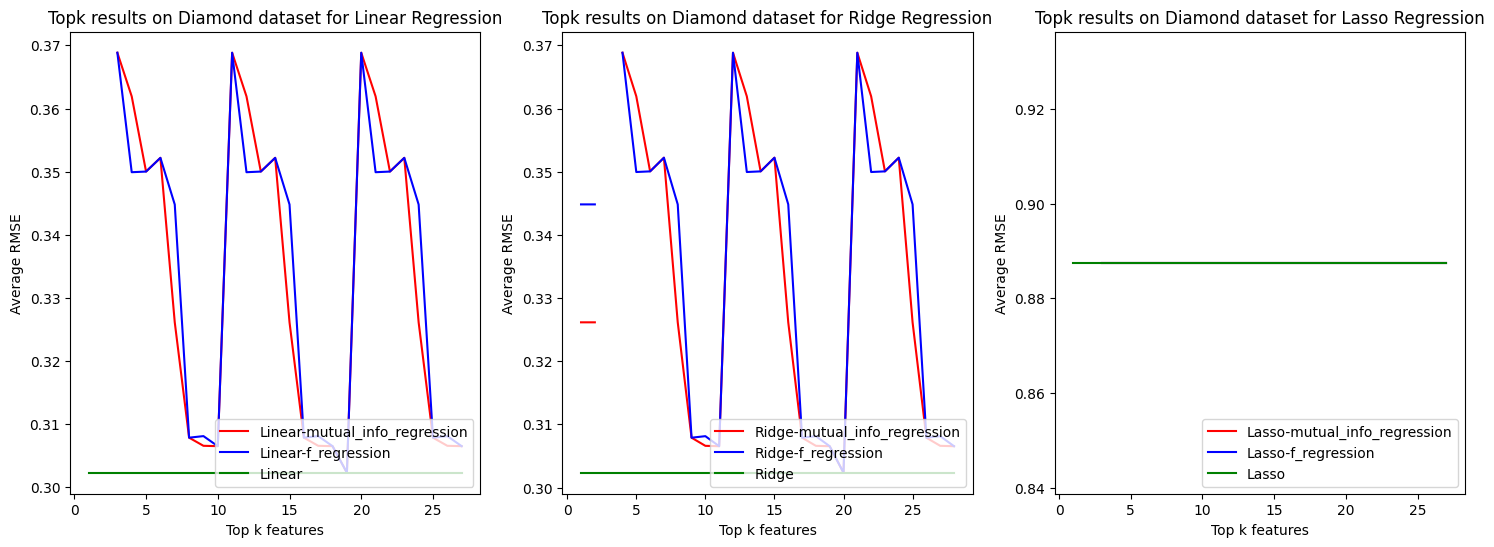

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#plot diamonds linear
axes[0].plot(np.arange(1, len(diamonds_rmse_lr_m) + 1, 1), np.negative(diamonds_rmse_lr_m), color = 'r', label = 'Linear-mutual_info_regression')
axes[0].plot(np.arange(1, len(diamonds_rmse_lr_f) + 1, 1), np.negative(diamonds_rmse_lr_f), color = 'b', label = 'Linear-f_regression')
axes[0].plot(np.arange(1, len(diamonds_rmse_lr) + 1, 1), np.negative(diamonds_rmse_lr), color = 'g', label = 'Linear')

axes[0].legend(loc='lower right')
axes[0].set(xlabel='Top k features',ylabel='Average RMSE')
axes[0].set_title('Topk results on Diamond dataset for Linear Regression')

#plot diamonds Ridge
axes[1].plot(np.arange(1, len(diamonds_rmse_r_m) + 1, 1), np.negative(diamonds_rmse_r_m), color = 'r', label = 'Ridge-mutual_info_regression')
axes[1].plot(np.arange(1, len(diamonds_rmse_r_f) + 1, 1), np.negative(diamonds_rmse_r_f), color = 'b', label = 'Ridge-f_regression')
axes[1].plot(np.arange(1, len(diamonds_rmse_r) + 1, 1), np.negative(diamonds_rmse_r), color = 'g', label = 'Ridge')

axes[1].legend(loc='lower right')
axes[1].set(xlabel='Top k features',ylabel='Average RMSE')
axes[1].set_title('Topk results on Diamond dataset for Ridge Regression')

#plot diamonds Lasso
axes[2].plot(np.arange(1, len(diamonds_rmse_la_m) + 1, 1), np.negative(diamonds_rmse_la_m), color = 'r', label = 'Lasso-mutual_info_regression')
axes[2].plot(np.arange(1, len(diamonds_rmse_la_f) + 1, 1), np.negative(diamonds_rmse_la_f), color = 'b', label = 'Lasso-f_regression')
axes[2].plot(np.arange(1, len(diamonds_rmse_la) + 1, 1), np.negative(diamonds_rmse_la), color = 'g', label = 'Lasso')

axes[2].legend(loc='lower right')
axes[2].set(xlabel='Top k features',ylabel='Average RMSE')
axes[2].set_title('Topk results on Diamond dataset for Lasso Regression')

Text(0.5, 1.0, 'Topk results on gt dataset for Lasso Regression')

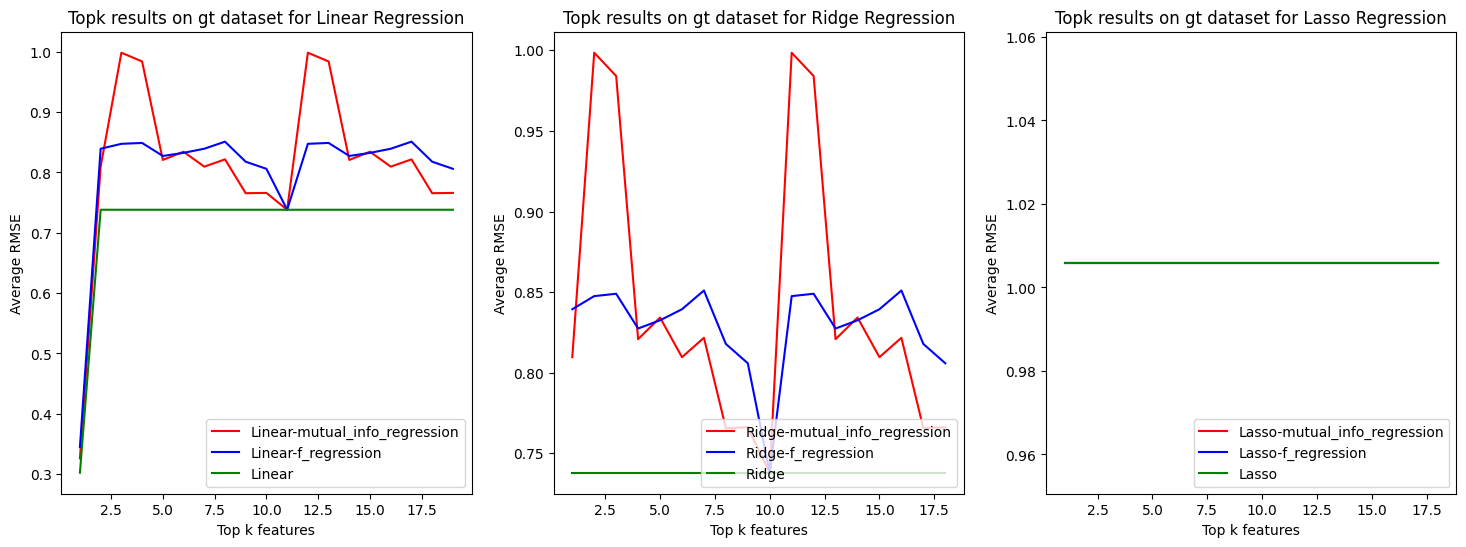

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#plot gt linear
axes[0].plot(np.arange(1, len(gt_rmse_lr_m) + 1, 1), np.negative(gt_rmse_lr_m), color = 'r', label = 'Linear-mutual_info_regression')
axes[0].plot(np.arange(1, len(gt_rmse_lr_f) + 1, 1), np.negative(gt_rmse_lr_f), color = 'b', label = 'Linear-f_regression')
axes[0].plot(np.arange(1, len(gt_rmse_lr) + 1, 1), np.negative(gt_rmse_lr), color = 'g', label = 'Linear')

axes[0].legend(loc='lower right')
axes[0].set(xlabel='Top k features',ylabel='Average RMSE')
axes[0].set_title('Topk results on gt dataset for Linear Regression')

#plot gt Ridge
axes[1].plot(np.arange(1, len(gt_rmse_r_m) + 1, 1), np.negative(gt_rmse_r_m), color = 'r', label = 'Ridge-mutual_info_regression')
axes[1].plot(np.arange(1, len(gt_rmse_r_f) + 1, 1), np.negative(gt_rmse_r_f), color = 'b', label = 'Ridge-f_regression')
axes[1].plot(np.arange(1, len(gt_rmse_r) + 1, 1), np.negative(gt_rmse_r), color = 'g', label = 'Ridge')

axes[1].legend(loc='lower right')
axes[1].set(xlabel='Top k features',ylabel='Average RMSE')
axes[1].set_title('Topk results on gt dataset for Ridge Regression')

#plot gt Lasso
axes[2].plot(np.arange(1, len(gt_rmse_la_m) + 1, 1), np.negative(gt_rmse_la_m), color = 'r', label = 'Lasso-mutual_info_regression')
axes[2].plot(np.arange(1, len(gt_rmse_la_f) + 1, 1), np.negative(gt_rmse_la_f), color = 'b', label = 'Lasso-f_regression')
axes[2].plot(np.arange(1, len(gt_rmse_la) + 1, 1), np.negative(gt_rmse_la), color = 'g', label = 'Lasso')

axes[2].legend(loc='lower right')
axes[2].set(xlabel='Top k features',ylabel='Average RMSE')
axes[2].set_title('Topk results on gt dataset for Lasso Regression')

#### Question4.2

In [34]:
# Finding the optimal penalty parameter
location = "cachedir"
memory = Memory(location=location, verbose=10)

pipe_ = Pipeline([
    ('kbest', SelectKBest()),
    ('model', "passthrough")
], memory = memory)

param_grid = [{
        'kbest__score_func': (mutual_info_regression, f_regression),
        'kbest__k': (1, 2, 3, 4, 5, 6, 7, 8, 9),
        'model': [Ridge(), Lasso()],
        'model__alpha': [10.0**x for x in np.arange(-3,4)]
    }
]

In [43]:
def _print_gridsearch_result(model, title):
    # print(model.cv_results_.keys())
    # print(f"Best estimator for {title}: ", model.best_estimator_)
    print(f"Best parameters for {title}: ", model.best_params_)
    print(f"Best score for {title}: ", model.best_score_)

In [37]:
grid_diamond = GridSearchCV(pipe_, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1, 
                     scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(diamond_standard_x, diamond_standard_y)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir\joblib\sklearn\pipeline\_fit_transform_one\d116ca552df2ab81931753098ad2ebb1
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


In [42]:
grid_gt = GridSearchCV(pipe_, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 1, 
                     scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(gt_standard_x, gt_standard_y)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(SelectKBest(k=9,
            score_func=<function mutual_info_regression at 0x000001C491BDFCA0>), 
             AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0     -1.762362  0.871052  0.401627 -0.451875 -0.377702  0.272119  0.536589   
1     -1.801920  0.809164  0.440351 -0.458207 -0.384376  0.266417  0.568742   
2     -1.854113  0.824636  0.483432 -0.442831 -0.375081  0.289227  0.589203   
3     -1.875718  0.809164  0.523263 -0.445415 -0.393909  0.289227  0.586280   
4     -1.874644  0.731804  0.505837 -0.448904 -0.392479  0.255012  0.561434   
...         ...       ...       ...       ...       ...       ...       ...   
36728 -1.891401  2.387315  1.060287 -0.981255 -1.543602 -2.533516 -0.667691   
36729 -1.818812  2.402787  1.118097 -0.947401 -1

In [45]:
_print_gridsearch_result(grid_diamond, "diamond with select k best and Ridge/Lasso Regression")

Best parameters for diamond with select k best and Ridge/Lasso Regression:  {'kbest__k': 6, 'kbest__score_func': <function f_regression at 0x000001C491599790>, 'model': Ridge(alpha=0.001), 'model__alpha': 0.001}
Best score for diamond with select k best and Ridge/Lasso Regression:  -0.3009287838936753


In [46]:
_print_gridsearch_result(grid_gt, "gt with select k best and Ridge/Lasso Regression")

Best parameters for gt with select k best and Ridge/Lasso Regression:  {'kbest__k': 9, 'kbest__score_func': <function mutual_info_regression at 0x000001C491BDFCA0>, 'model': Lasso(alpha=0.001), 'model__alpha': 0.001}
Best score for gt with select k best and Ridge/Lasso Regression:  -0.7343103801066775


#### Question4.3 is stated on our report

#### Question4.4

In [62]:
print("diamond")
for feature in diamonds_features:
    slope, intercept, r, p, stderr = ss.linregress(diamond_standard_x[feature], diamond_standard_y)
    print(f"{str(feature)} p = {p:.4f}")

diamond
carat p = 0.0000
cut p = 0.0000
color p = 0.0000
clarity p = 0.0000
depth p = 0.0134
table p = 0.0000
x p = 0.0000
y p = 0.0000
z p = 0.0000


In [63]:
print("gt")
for feature in gt_features:
    slope, intercept, r, p, stderr = ss.linregress(gt_standard_x[feature], gt_standard_y)
    print(f"{str(feature)} p = {p:.4f}")

gt
AT p = 0.0000
AP p = 0.0000
AH p = 0.0000
AFDP p = 0.0000
GTEP p = 0.0000
TIT p = 0.0000
TAT p = 0.0000
TEY p = 0.0000
CDP p = 0.0000


In [54]:
diamond_sm_fit = sm.OLS(diamond_standard_y, sm.add_constant(diamond_standard_x)).fit()
diamond_sm_fit.pvalues.sort_values(ascending=False)

const       1.000000e+00
y           2.107936e-01
z           1.613988e-01
cut         4.621671e-56
depth      2.045036e-113
x          1.327592e-125
table      2.044967e-133
carat       0.000000e+00
color       0.000000e+00
clarity     0.000000e+00
dtype: float64

In [55]:
gt_sm_fit = sm.OLS(gt_standard_y, sm.add_constant(gt_standard_x)).fit()
gt_sm_fit.pvalues.sort_values(ascending=False)

const     1.000000e+00
GTEP      4.225138e-02
CDP       4.355106e-03
AFDP      5.737233e-16
AP       1.254925e-186
AT        0.000000e+00
AH        0.000000e+00
TIT       0.000000e+00
TAT       0.000000e+00
TEY       0.000000e+00
dtype: float64

### Question5

#### Question5.1

In [20]:
diamond_standard_x_top6 = SelectKBest(score_func = f_regression, k = 6).fit_transform(diamond_standard_x, diamond_standard_y)
gt_standard_x_top9 = SelectKBest(score_func = mutual_info_regression, k = 9).fit_transform(gt_standard_x, gt_standard_y)

In [27]:
location = "cachedir"
memory = Memory(location=location, verbose=10)

poly_pipe_diamond_ = Pipeline([
    ('poly_transform', PolynomialFeatures()),
    ('model', Ridge(alpha=0.001))
],memory=memory)

poly_pipe_gt_ = Pipeline([
    ('poly_transform', PolynomialFeatures()),
    ('model', Lasso(alpha=0.001))
],memory=memory)

poly_param_= {
    'poly_transform__degree': np.arange(1,6,1)
}

In [85]:
poly_grid_diamond  = GridSearchCV(poly_pipe_diamond_ , param_grid=poly_param_, cv=10, n_jobs=-1, verbose=3, scoring='neg_root_mean_squared_error', return_train_score=True, error_score='raise').fit(diamond_standard_x_top6, diamond_standard_y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir\joblib\sklearn\pipeline\_fit_transform_one\012759a68728318cec0c39231233ebab
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


In [29]:
poly_grid_gt  = GridSearchCV(poly_pipe_gt_ , param_grid=poly_param_, cv=10, n_jobs=-1, verbose=3, scoring='neg_root_mean_squared_error', return_train_score=True, error_score='raise').fit(gt_standard_x_top9, gt_standard_y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[Memory]0.0s, 0.0min    : Loading _fit_transform_one from cachedir\joblib\sklearn\pipeline\_fit_transform_one\8315585baec85d14a2daa7692ec6c276
___________________________________fit_transform_one cache loaded - 0.0s, 0.0min


In [86]:
_print_gridsearch_result(poly_grid_diamond, "PolynomialFeatures of Diamonds" )

Best parameters for PolynomialFeatures of Diamonds:  {'poly_transform__degree': 1}
Best score for PolynomialFeatures of Diamonds:  -0.30787053657268926


In [34]:
print(poly_grid_diamond.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_poly_transform__degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])


In [32]:
_print_gridsearch_result(poly_grid_gt, "PolynomialFeatures of gt" )

Best parameters for PolynomialFeatures of gt:  {'poly_transform__degree': 3}
Best score for PolynomialFeatures of gt:  -0.5951110578174913


In [71]:
s_d = SelectKBest(score_func = f_regression, k = 6)
s_d.fit_transform(diamond_standard_x, diamond_standard_y)
column_s = diamond_standard_x.columns[s_d.get_support()].tolist()

d_params = poly_grid_diamond.best_estimator_.get_params()
d_coefs = d_params['model'].coef_
d_names = d_params['poly_transform'].get_feature_names(column_s)
d_sorted_indice = np.argsort(-abs(d_coefs))
salient_features =[d_names[i] for i in d_sorted_indice[:6]]
print ('Top 6 Salient features (Diamond) in order:',salient_features)

Top 6 Salient features (Diamond) in order: ['carat', 'clarity', 'x', 'color', 'z', 'y']


In [1]:
s_g = SelectKBest(score_func = mutual_info_regression, k = 9)
s_g.fit_transform(gt_standard_x, gt_standard_y)
column_g = gt_standard_x.columns[s_g.get_support()].tolist()

d_params = poly_grid_gt.best_estimator_.get_params()
d_coefs = d_params['model'].coef_
d_names = d_params['poly_transform'].get_feature_names(column_g)
d_sorted_indice = np.argsort(-abs(d_coefs))
salient_features =[d_names[i] for i in d_sorted_indice[:9]]
print ('Top 9 Salient features (Diamond) in order:',salient_features)

Top 9 Salient features (gt) in order: ['TIT', 'TEY', 'TAT', 'AT', 'CDP', 'AT TEY^2', 'CDP^2', 'AFDP TAT', 'TIT TAT']


#### Question5.2 is stated on our report

### Question6
#### Question6.1

In [11]:
mlpr = Pipeline([
    ('model', MLPRegressor()),
    
], memory=memory)

param_list = {
    "model__hidden_layer_sizes": [(30, 40), (30, 60), (40, 40), (40, 60), (60, 60)], 
    "model__activation": ["identity", "logistic", "tanh", "relu"],
    "model__solver": ["lbfgs", "sgd", "adam"], 
}

grid_diamond_mlp = GridSearchCV(mlpr, param_grid = param_list, cv = 5, n_jobs = -1, verbose = 1, 
                     scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(diamond_standard_x_top6, diamond_standard_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [12]:
grid_gt_mlp = GridSearchCV(mlpr, param_grid = param_list, cv = 5, n_jobs = -1, verbose = 1, 
                     scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(gt_standard_x_top9, gt_standard_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [13]:
_print_gridsearch_result(grid_diamond_mlp, "Neural Network of Diamonds" )
rmse = np.sqrt(-grid_diamond_mlp.best_score_)
print(f"original rmse = {rmse}")

_print_gridsearch_result(grid_gt_mlp, "Neural Network of gt" )
rmse = np.sqrt(-grid_gt_mlp.best_score_)
print(f"new rmse = {rmse}")

Best parameters for Neural Network of Diamonds:  {'model__activation': 'relu', 'model__hidden_layer_sizes': (30, 60), 'model__solver': 'sgd'}
Best score for Neural Network of Diamonds:  -0.2482196345112592
original rmse = 0.4982164534730454
Best parameters for Neural Network of gt:  {'model__activation': 'logistic', 'model__hidden_layer_sizes': (30, 60), 'model__solver': 'sgd'}
Best score for Neural Network of gt:  -0.628648815583329
new rmse = 0.7928737702707341


#### Question6.2 6.3 6.4 are stated on our report
### Question7
#### Question7.1

In [11]:
from sklearn.ensemble import RandomForestRegressor
pipeline_forest = Pipeline([
    ('model', RandomForestRegressor())
],memory=memory)
                         
param_grid_forest = {
    'model__max_features': np.arange(1, 5, 1),
    'model__n_estimators': np.arange(10, 40, 10),
    'model__max_depth': np.arange(1, 5, 1)
}

In [14]:
grid_diamond_forest = GridSearchCV(pipeline_forest, param_grid = param_grid_forest, cv = 10, n_jobs = -1, verbose = 3, 
                     scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(diamond_standard_x_top6, diamond_standard_y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [16]:
_print_gridsearch_result(grid_diamond_forest, "RandomForestRegressor for diamond")

Best parameters for RandomForestRegressor for diamond:  {'model__max_depth': 4, 'model__max_features': 4, 'model__n_estimators': 10}
Best score for RandomForestRegressor for diamond:  -0.32233482446629436


In [15]:
grid_gt_forest = GridSearchCV(pipeline_forest, param_grid = param_grid_forest, cv = 10, n_jobs = -1, verbose = 3, 
                     scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(gt_standard_x_top9, gt_standard_y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [17]:
_print_gridsearch_result(grid_gt_forest, "RandomForestRegressor for gt")

Best parameters for RandomForestRegressor for gt:  {'model__max_depth': 4, 'model__max_features': 4, 'model__n_estimators': 30}
Best score for RandomForestRegressor for gt:  -0.7032853751208423


#### Question7.2 is stated on our report
#### Question7.3

In [11]:
s_d = SelectKBest(score_func = f_regression, k = 6)
s_d.fit_transform(diamond_standard_x, diamond_standard_y)
column_s = diamond_standard_x.columns[s_d.get_support()].tolist()

s_g = SelectKBest(score_func = mutual_info_regression, k = 9)
s_g.fit_transform(gt_standard_x, gt_standard_y)
column_g = gt_standard_x.columns[s_g.get_support()].tolist()

In [2]:
print(column_s)
print(column_g)

 ['carat', 'color', 'clarity', 'x', 'y', 'z'] 
 ['TIT', 'AP', 'AH', 'AFDP', 'GTEP', 'AT', 'TAT', 'TEY', 'CDP']


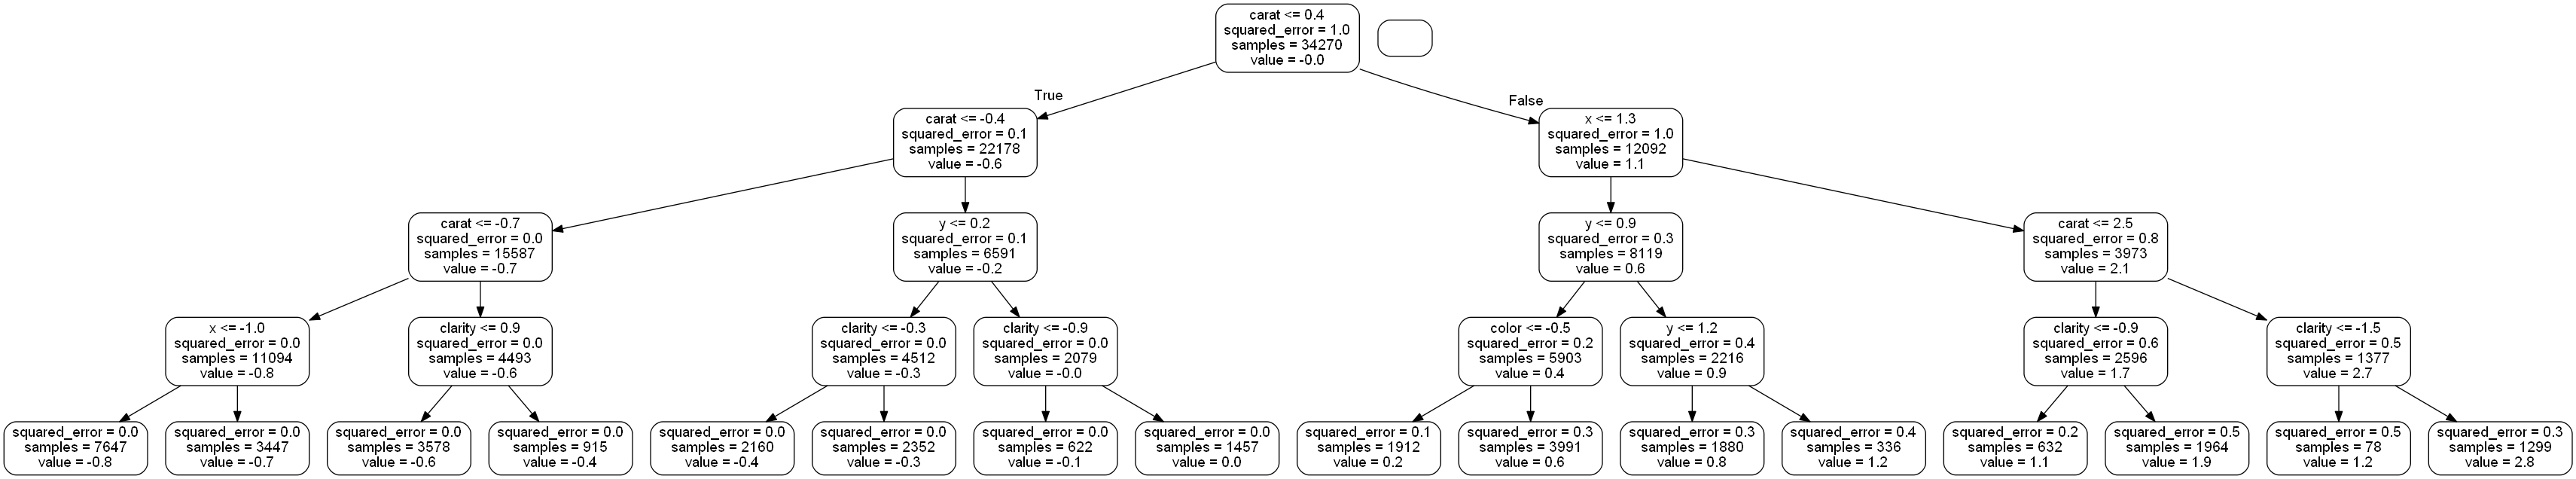

In [15]:
rf_best_diamond = RandomForestRegressor(max_depth=4, max_features=4, n_estimators=10)
rf_best_diamond.fit(diamond_standard_x_top6, diamond_standard_y)
export_graphviz(rf_best_diamond.estimators_[1], out_file = 'rf_best_diamond.dot', feature_names = column_s, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('rf_best_diamond.dot')
Image(graph.create_png())

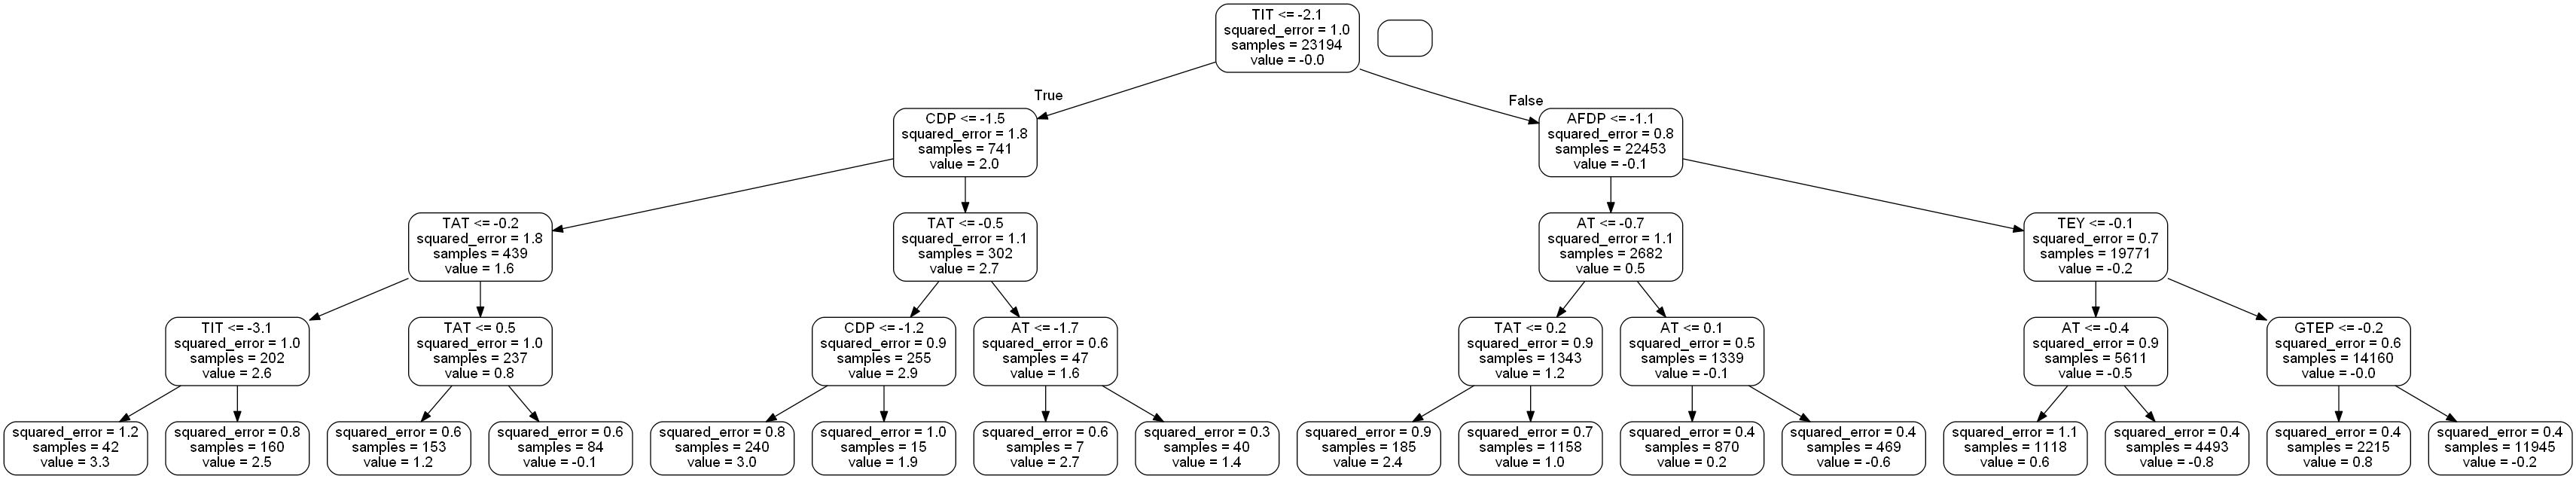

In [16]:
rf_best_gt = RandomForestRegressor(max_depth=4, max_features=4, n_estimators=30)
rf_best_gt.fit(gt_standard_x_top9, gt_standard_y)
export_graphviz(rf_best_gt.estimators_[1], out_file = 'rf_best_gt.dot', feature_names = column_g, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('rf_best_gt.dot')
Image(graph.create_png())

#### Question7.4

In [2]:
rf_diamond_ = RandomForestRegressor(n_estimators=10, max_features=4, max_depth=4, oob_score=True)
rf_diamond_.fit(diamond_standard_x_top6, diamond_standard_y)
                   
print('Best Random Forest Model for Diamond Dataset:')
print('OOB score: %.4f' %(rf_diamond_.oob_score_))
print('R^2 score: %.4f' %(rf_diamond_.score(diamond_standard_x_top6, diamond_standard_y)))

Best Random Forest Model for Diamond Dataset: 
 OOB score: 0.9113 
 R^2 score: 0.9283


In [3]:
rf_gt_ = RandomForestRegressor(n_estimators=30, max_features=4, max_depth=4, oob_score=True)
rf_gt_.fit(gt_standard_x, gt_standard_y)
                   
print('Best Random Forest Model for Diamond Dataset:')
print('OOB score: %.4f' %(rf_gt_.oob_score_))
print('R^2 score: %.4f' %(rf_gt_.score(gt_standard_x, gt_standard_y)))

Best Random Forest Model for gt Dataset: 
 OOB score: 0.5951 
 R^2 score: 0.6063


### Question8
#### Question8.1 is stated on our report
#### Question8.2 is stated on our report

In [43]:
### LightGBM
lbg_pip_ = Pipeline([
    ('model', lgb.LGBMRegressor())
],memory = memory)

param_lgb_ = {
    'model__num_leaves': [7, 14, 21, 28, 31, 50],
    'model__learning_rate': [0.1, 0.03, 0.003],
    'model__max_depth': [-1, 3, 5],
    'model__n_estimators': [50, 100, 200, 500],
}

In [44]:
lg_diamond = BayesSearchCV(lbg_pip_, search_spaces=param_lgb_, cv=10, n_jobs=-1, verbose=1, 
    scoring='neg_root_mean_squared_error', return_train_score=True).fit(diamond_standard_x_top6, diamond_standard_y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [45]:
lg_gt = BayesSearchCV(lbg_pip_, search_spaces=param_lgb_, cv=10, n_jobs=-1, verbose=1, 
    scoring='neg_root_mean_squared_error', return_train_score=True).fit(gt_standard_x_top9, gt_standard_y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [46]:
_print_gridsearch_result(lg_diamond, "LightGBM of Diamonds" )

Best parameters for LightGBM of Diamonds:  OrderedDict([('model__learning_rate', 0.1), ('model__max_depth', 5), ('model__n_estimators', 500), ('model__num_leaves', 7)])
Best score for LightGBM of Diamonds:  -0.15290674289254738
RMSE is 0.3910329179142689


In [47]:
_print_gridsearch_result(lg_gt, "LightGBM of gt" )

Best parameters for LightGBM of gt:  OrderedDict([('model__learning_rate', 0.1), ('model__max_depth', 5), ('model__n_estimators', 200), ('model__num_leaves', 31)])
Best score for LightGBM of gt:  -0.5926654920848259
RMSE is 0.769847707072526


In [53]:
### CatBoostClassifier

# model_cat = CatBoostClassifier()

# grid_cat = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}

#### Question8.3 is stated on our report